In [2]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools

import numpy as np
from scipy import linalg
import matplotlib as mpl

import scipy.stats 
import pickle 
from sklearn import mixture

csvfile = "crashed5D_train.csv"  #file name 
#avffile="crashed_10_avf.csv"

In [3]:
data_train= pd.read_csv(csvfile)
data_train.head()
#data_avf=pd.read_csv(avffile)

,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance,test
0,109,58.41,0.65,0.8,48.42,17.12,-1160.53,-0.20,1.0
1,280,59.23,0.44,0.8,43.17,22.01,-1118.70,-0.48,1.0
2,3308,59.45,0.46,0.8,33.38,19.75,-1125.02,-0.24,1.0
3,3321,58.11,0.36,0.8,41.69,9.61,-1119.80,-0.45,1.0
4,3324,52.12,0.44,0.8,49.99,18.09,-1139.74,-0.33,1.0


In [7]:
bic_store=[]
X=data_train[["Kick_Speed","friction_patch","loc_patch","size_patch"]].iloc[169:180]
#Y=list(data_avf["Kick_Speed"])
#t_data=X+Y

#print('Total Data:',t_data)
#X=np.array(t_data).reshape(-1,1)
print("X is:",X)

X is:      Kick_Speed  friction_patch  loc_patch  size_patch
169       40.20            0.44      42.20       15.96
170       32.16            0.77      69.03       13.47
171       30.91            0.49      45.59       18.92
172       51.33            0.72      57.34        8.10
173       44.63            0.68      60.07       13.37
174       71.58            0.36      35.73        9.17
175       69.47            0.47      89.97       26.98
176       65.31            0.36      53.87       14.45
177       65.85            0.36      54.04       21.64
178       70.50            0.58      41.78       23.92


[243.58831613134828, 170.90453346790417, 83.67129880845016, -23.825564986396472, -63.056146808183456, -94.68715218291268]


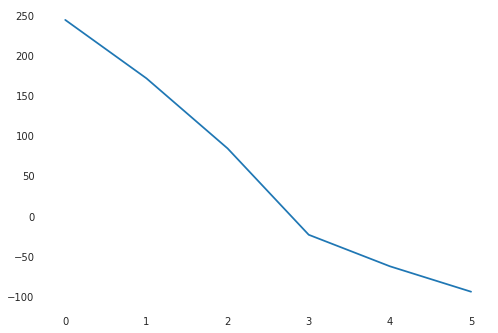

In [8]:
for i in range(6):
 gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full',n_init=200).fit(X)
 bic=gmm.bic(X)
 bic_store.append(bic)
print(bic_store)
plt.plot(bic_store)

In [9]:
i=1
gmm_5D = mixture.GaussianMixture(n_components=i+1, covariance_type='full',n_init=200).fit(X)
bic=gmm_5D.bic(X)
print(bic)

170.90453346790417


In [10]:
with open('gmm_5D', 'wb') as f:
    pickle.dump(gmm_5D, f)

In [13]:
with open('gmm_5D', 'rb') as f:
    model = pickle.load(f)
sample = model.sample(1)
print(sample)

(array([[36.58781838,  0.51947479, 41.14670224, 12.1260895 ]]), array([0]))


In [14]:
print(sample[0][0][0])
print(sample[0][0][1])

36.587818379788146
0.5194747945798778


In [15]:
param=gmm_5D.means_;covar=gmm.covariances_
print("Means are :",param)
print("Variances are :",covar)

Means are : [[44.78333515  0.59499998 60.69999943 16.13333381]
 [68.31000032  0.41500001 46.35499901 17.29499944]]
Variances are : [[[ 2.91601000e-01 -5.94000000e-02 -1.63350000e+00 -3.98250000e+00]
  [-5.94000000e-02  1.21010000e-02  3.32750000e-01  8.11250000e-01]
  [-1.63350000e+00  3.32750000e-01  9.15062600e+00  2.23093750e+01]
  [-3.98250000e+00  8.11250000e-01  2.23093750e+01  5.43906260e+01]]

 [[ 2.15760260e+01 -1.16125000e-01 -7.87327500e+00 -6.87460000e+00]
  [-1.16125000e-01  6.26000000e-04  4.23750000e-02  3.70000000e-02]
  [-7.87327500e+00  4.23750000e-02  2.87302600e+00  2.50860000e+00]
  [-6.87460000e+00  3.70000000e-02  2.50860000e+00  2.19040100e+00]]

 [[ 1.00000000e-06  1.64871929e-28  3.11000523e-26  9.44108731e-27]
  [ 1.64871929e-28  1.00000000e-06  2.09837001e-28  6.37005181e-29]
  [ 3.11000523e-26  2.09837001e-28  1.00000000e-06  1.20159293e-26]
  [ 9.44108731e-27  6.37005181e-29  1.20159293e-26  1.00000000e-06]]

 [[ 1.12225010e+01  6.70000000e-02 -4.57275000e

[60.23, 56.79, 63.86, 50.77, 70.01, 45.81, 50.78, 49.54, 48.23, 55.48, 52.69, 56.91, 47.95, 79.13, 81.78, 81.85, 84.11, 78.85, 81.62, 82.31, 79.07]
Length of array : 21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


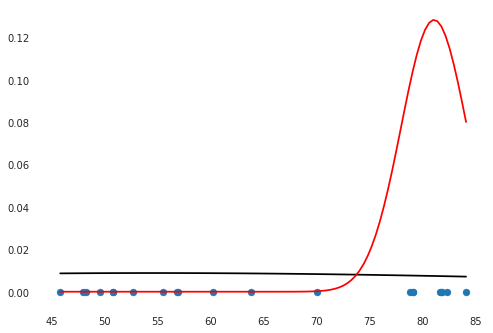

In [341]:
fig, ax = plt.subplots()
ar=t_data
print(ar)
#ax.scatter(data_test[["Kick_Speed"]], c = 'red',label='fail')
val = 0. # this is the value where you want the data to appear on the y-axis.
print('Length of array :',len(ar))
#plt.plot( ar,"ro")
#plt.hist(ar, bins = 10)
#plt.show()
y_loc=np.zeros_like(ar)
print(y_loc)
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.scatter(ar,y_loc)



#fig, ax = plt.subplots()
x_min = min(ar)
x_max =max(ar)


mean1 =param[0][0] ;std1 = covar[0][0]
mean2 =param[1][0] ;std2 = covar[1][0]
#mean3 =param[2][0] ;std3 = covar[2][0]
#mean4 =param[3][0] ;std4 = covar[3][0]
x = np.linspace(x_min, x_max, 100)

y1 = scipy.stats.norm.pdf(x,mean1,std1)
y2 = scipy.stats.norm.pdf(x,mean2,std2)
#y3 = scipy.stats.norm.pdf(x,mean3,std3)
#y4 = scipy.stats.norm.pdf(x,mean4,std4)
plt.plot(x,y1, color='black')
plt.plot(x,y2, color='red')
#plt.plot(x,y3, color='green')
#plt.plot(x,y4, color='blue')
plt.show()